In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import re
from haversine import haversine, Unit
import lightgbm as lgb
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing

In [7]:
def get_distance_center(lat1, lon1):
    dist = haversine((lat1, lon1), (55.751244, 37.618423), unit=Unit.METERS)
    return round(dist/1000, 3)

def get_distance_metro(lat, lon):
    shortest = np.inf
    for metro_coordinate in coordinates:
        dist = haversine(metro_coordinate, (lat, lon), unit=Unit.METERS)
        if dist < shortest:
            shortest = dist
    if shortest == np.inf:
        return 100
    return round(shortest/1000, 3)

def process_data(dataframe):
    columns = dataframe.columns.values
    """ columns = ['building_id', 'id_x', 'id_y', 'seller', 'price', 'area_total', 'area_kitchen', 
            'area_living', 'floor', 'rooms', 'layout', 'ceiling', 'bathrooms_shared', 
            'bathrooms_private', 'windows_court', 'windows_street', 'balconies', 'loggias', 
            'condition', 'phones', 'new', 'latitude', 'longitude', 'district', 'street', 'address', 
            'constructed', 'material', 'stories', 'elevator_without', 'elevator_passenger',
            'elevator_service', 'parking', 'garbage_chute', 'heating', 'distance_center', 'distance_metro'] """

    #remove_columns = ['latitude', 'longitude']
    remove_columns = ['street', 'address', 'building_id', 'id_y']

    dataframe = dataframe.drop(remove_columns, axis=1)
 
    #for column in dataframe.columns.values:
        #Finding the mean of the column having NaN
       # mean_value=dataframe[column].mean()
        
        # Replace NaNs in column S2 with the
        # mean of values in the same column
        #dataframe[column].fillna(value=mean_value, inplace=True)

    return dataframe

In [2]:
a = pd.read_csv("data/apartments_train.csv")
b = pd.read_csv("data/buildings_train.csv")
merged = a.merge(b, left_on='building_id', right_on='id')
merged.to_csv("prepared_data/apartments_and_building_train.csv", index=False)

a = pd.read_csv("data/apartments_test.csv")
b = pd.read_csv("data/buildings_test.csv")
merged = a.merge(b, left_on='building_id', right_on='id')
merged.to_csv("prepared_data/apartments_and_building_test.csv", index=False)

In [3]:
dfTrain = pd.read_csv("prepared_data/apartments_and_building_train.csv")
dfTest = pd.read_csv("prepared_data/apartments_and_building_test.csv")

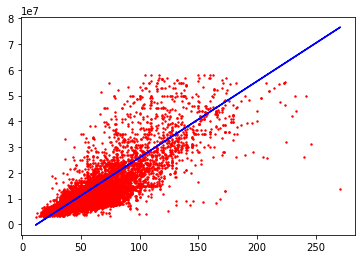

In [4]:
df = dfTrain.copy()
qhigh = df["price"].quantile(0.92)
qlow  = df["price"].quantile(0.005)
df = df[(df["price"] < qhigh) & (df["price"] > qlow)]
y = df["price"].copy()
X = df["area_total"].copy()
X_train = X[:10000]
y_train = y[:10000]
X_test  = X[10000:]
y_test  = y[10000:]
reg_model = LinearRegression()

reg_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
y_pred = reg_model.predict(X_test.values.reshape(-1, 1))
plt.scatter(X_test, y_test, s=2, color = 'red')
plt.plot(X_test, reg_model.predict(X_test.values.reshape(-1, 1)), color = 'blue')

In [8]:
# normalize training data
train_data = dfTrain.copy()
train_data = process_data(train_data)

In [15]:
train_data.isnull().sum()/len(train_data)

id_x                  0.000000
seller                0.379214
price                 0.000000
area_total            0.000000
area_kitchen          0.202749
area_living           0.166717
floor                 0.000000
rooms                 0.000000
layout                0.757655
ceiling               0.476401
bathrooms_shared      0.166287
bathrooms_private     0.166287
windows_court         0.346661
windows_street        0.346661
balconies             0.451793
loggias               0.451793
condition             0.421301
phones                0.003436
new                   0.011338
latitude              0.000000
longitude             0.000000
district              0.005583
constructed           0.034099
material              0.170582
stories               0.000000
elevator_without      0.015332
elevator_passenger    0.015332
elevator_service      0.015332
parking               0.291518
garbage_chute         0.378398
heating               0.350483
dtype: float64